In [13]:
import pandas as pd
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


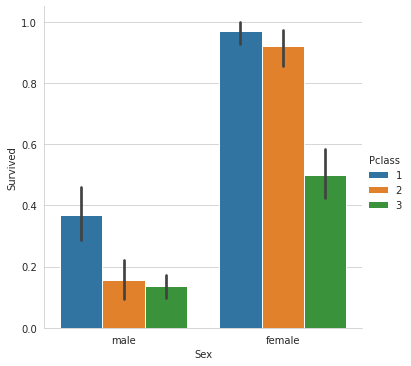

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df);

In [18]:
df['Pclass'].replace({1:'FirstC', 2:'SecondC', 3:'ThirdC'}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


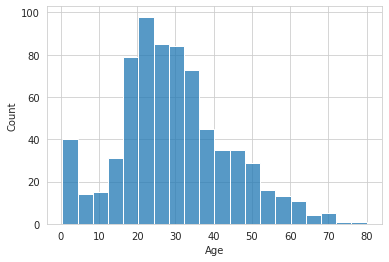

In [19]:
sns.histplot(df['Age']);

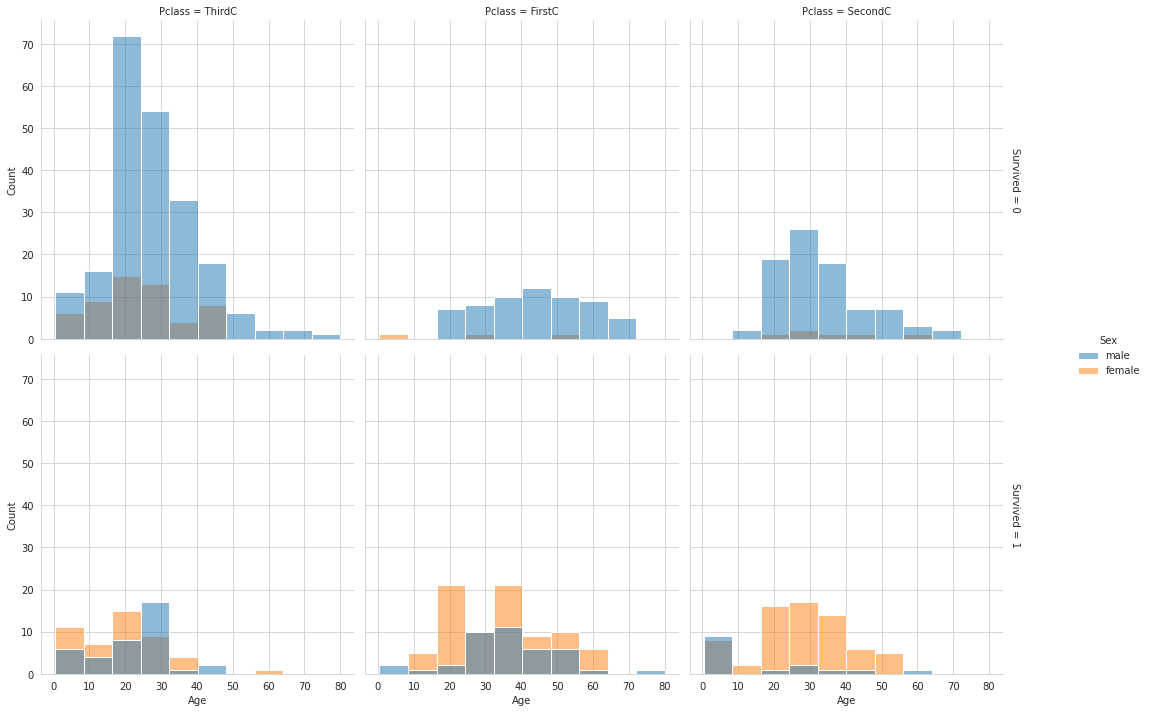

In [20]:
sns.displot(df, x='Age', hue='Sex', col='Pclass', row='Survived', facet_kws=dict(margin_titles=True), bins=10);

In [21]:
medians = df.groupby(['Pclass','Sex'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(medians)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.112424,13.304424,0.42,21.5000,26.0000,36.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
df['AgeCat'] = pd.cut(df['Age'], 3, labels=["young", "mid-age", "old"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat
PassengerId,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,mid-age
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,mid-age
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,mid-age


In [24]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile')
columns = df[['Age']]
kbins.fit(columns)
t = kbins.transform(columns)
t = t.todense()
edges = kbins.bin_edges_[0].round(1)
labels = []
for i in range(len(edges)-1):
    edge1 = edges[i]
    edge2 = edges[i+1]
    labels.append(f"{edge1} to {edge2}")

df_Age_bins = pd.DataFrame(t, columns=labels)
df_Age_bins.head()

df_Age_bins.shape

df = pd.concat([df, df_Age_bins], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,0.4 to 24.0,24.0 to 32.5,32.5 to 80.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
1,0.0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,young,0.0,0.0,1.0
2,1.0,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,mid-age,0.0,1.0,0.0
3,1.0,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,young,0.0,0.0,1.0
4,1.0,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,mid-age,0.0,0.0,1.0


In [25]:
df['ChildBin'] = df['Age'].apply(lambda x: 'Child' if x <= 18 else 'Adult')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,0.4 to 24.0,24.0 to 32.5,32.5 to 80.0,ChildBin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,Adult
1,0.0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,young,0.0,0.0,1.0,Adult
2,1.0,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,mid-age,0.0,1.0,0.0,Adult
3,1.0,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,young,0.0,0.0,1.0,Adult
4,1.0,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,mid-age,0.0,0.0,1.0,Adult


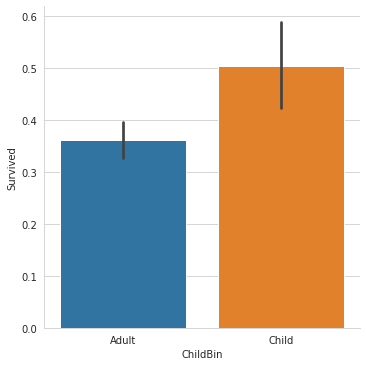

In [26]:
sns.catplot(x="ChildBin", y="Survived", kind="bar", data=df);

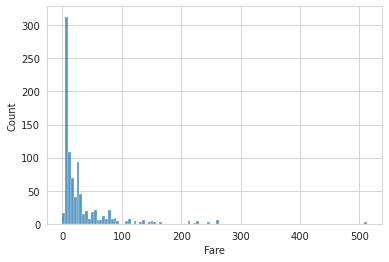

In [27]:
sns.histplot(df['Fare']);

In [28]:
df['Fare'].fillna(value=df['Fare'].median(), inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    float64 
 1   Pclass        891 non-null    object  
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    float64 
 6   Parch         891 non-null    float64 
 7   Ticket        891 non-null    object  
 8   Fare          892 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      889 non-null    object  
 11  AgeCat        891 non-null    category
 12  0.4 to 24.0   891 non-null    float64 
 13  24.0 to 32.5  891 non-null    float64 
 14  32.5 to 80.0  891 non-null    float64 
 15  ChildBin      892 non-null    object  
dtypes: category(1), float64(8), object(7)
memory usage: 152.5+ KB


In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df['FareScaled'] = min_max_scaler.fit_transform(df[['Fare']])
df['FareScaled'].head()

0    0.028213
1    0.014151
2    0.139136
3    0.015469
4    0.103644
Name: FareScaled, dtype: float64

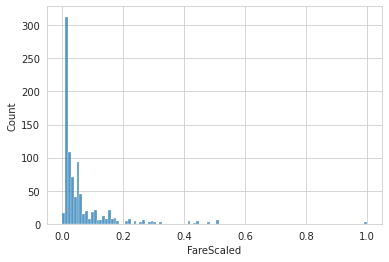

In [31]:
sns.histplot(df['FareScaled']);

In [32]:
df['Embarked'].mode()

0    S
dtype: object

In [33]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 891
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    float64 
 1   Pclass        891 non-null    object  
 2   Name          891 non-null    object  
 3   Sex           891 non-null    object  
 4   Age           891 non-null    float64 
 5   SibSp         891 non-null    float64 
 6   Parch         891 non-null    float64 
 7   Ticket        891 non-null    object  
 8   Fare          892 non-null    float64 
 9   Cabin         204 non-null    object  
 10  Embarked      892 non-null    object  
 11  AgeCat        891 non-null    category
 12  0.4 to 24.0   891 non-null    float64 
 13  24.0 to 32.5  891 non-null    float64 
 14  32.5 to 80.0  891 non-null    float64 
 15  ChildBin      892 non-null    object  
 16  FareScaled    892 non-null    float64 
dtypes: category(1), float64(9), object(7)
memory usage: 15

In [35]:
df['Embarked'].replace({'C':'Cherbourg', 'Q':'Queenstown', 'S':'Southampton'}, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,0.4 to 24.0,24.0 to 32.5,32.5 to 80.0,ChildBin,FareScaled
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4542,NaN,Southampton,NaN,1.0,0.0,0.0,Adult,0.028213
1,0.0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,Southampton,young,0.0,0.0,1.0,Adult,0.014151
2,1.0,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,Cherbourg,mid-age,0.0,1.0,0.0,Adult,0.139136
3,1.0,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,Southampton,young,0.0,0.0,1.0,Adult,0.015469
4,1.0,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,Southampton,mid-age,0.0,0.0,1.0,Adult,0.103644


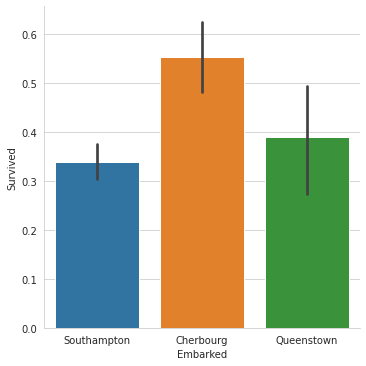

In [36]:
sns.catplot(x="Embarked", y="Survived", kind="bar", data=df);

In [37]:
df["Family_Size"] = df["SibSp"] + df["Parch"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCat,0.4 to 24.0,24.0 to 32.5,32.5 to 80.0,ChildBin,FareScaled,Family_Size
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4542,NaN,Southampton,NaN,1.0,0.0,0.0,Adult,0.028213,NaN
1,0.0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,Southampton,young,0.0,0.0,1.0,Adult,0.014151,1.0
2,1.0,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,Cherbourg,mid-age,0.0,1.0,0.0,Adult,0.139136,1.0
3,1.0,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,Southampton,young,0.0,0.0,1.0,Adult,0.015469,0.0
4,1.0,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,Southampton,mid-age,0.0,0.0,1.0,Adult,0.103644,1.0


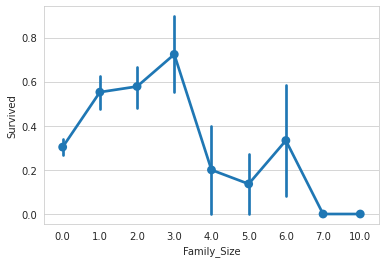

In [38]:
sns.pointplot(x="Family_Size", y="Survived", data=df);

In [39]:
from sklearn.preprocessing import OneHotEncoder
ohc_cls = OneHotEncoder(sparse=False, handle_unknown='ignore')
cls_col = df[['Pclass']]
ohc_cls.fit(cls_col)
t_cls = ohc_cls.transform(cls_col)
#print(t_cls.shape)
t_cls_df = pd.DataFrame(t_cls, columns=ohc_cls.categories_)
t_cls_df.head()

ValueError: Input contains NaN

In [28]:
#t_cls_df.info()

In [40]:

ohc_sex = OneHotEncoder(sparse=False, handle_unknown='ignore')
sex_col = df[['Sex']]
ohc_sex.fit(sex_col)
t_sex = ohc_sex.transform(sex_col)
#print(t_sex.shape)
t_sex_df = pd.DataFrame(t_sex, columns=ohc_sex.categories_)
#t_sex_df.head()
t_sex_df = t_sex_df[['female']]
t_sex_df.head()


ValueError: Input contains NaN

In [41]:

ohc_emb = OneHotEncoder(sparse=False, handle_unknown='ignore')
emb_col = df[['Embarked']]
ohc_emb.fit(emb_col)
t_emb = ohc_emb.transform(emb_col)
#print(t_emb.shape)
t_emb_df = pd.DataFrame(t_emb, columns=ohc_emb.categories_)
t_emb_df.head()


,Cherbourg,Queenstown,Southampton
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [42]:

df_m = pd.concat([t_cls_df, t_sex_df, t_emb_df], axis=1)
df_m.head()


NameError: name 't_cls_df' is not defined

In [43]:

df_temp = pd.concat([df.reset_index(drop=True), df_m], axis=1, join="inner")
df_temp.head()


NameError: name 'df_m' is not defined

In [44]:
df = pd.concat([df,pd.get_dummies(df['Pclass'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeCat,0.4 to 24.0,24.0 to 32.5,32.5 to 80.0,ChildBin,FareScaled,Family_Size,FirstC,SecondC,ThirdC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.4542,NaN,...,NaN,1.0,0.0,0.0,Adult,0.028213,NaN,0,0,0
1,0.0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,...,young,0.0,0.0,1.0,Adult,0.014151,1.0,0,0,1
2,1.0,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,...,mid-age,0.0,1.0,0.0,Adult,0.139136,1.0,1,0,0
3,1.0,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,...,young,0.0,0.0,1.0,Adult,0.015469,0.0,0,0,1
4,1.0,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,...,mid-age,0.0,0.0,1.0,Adult,0.103644,1.0,1,0,0


In [34]:
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ChildBin,FareScaled,Family_Size,FirstC,SecondC,ThirdC,female,male
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Adult,0.014151,1,0,0,1,0,1
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,0.139136,1,1,0,0,1,0
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Adult,0.015469,0,0,0,1,1,0
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,0.103644,1,1,0,0,1,0
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Adult,0.015713,0,0,0,1,0,1


In [35]:
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FareScaled,Family_Size,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0.014151,1,0,0,1,0,1,0,0,1
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0.139136,1,1,0,0,1,0,1,0,0
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0.015469,0,0,0,1,1,0,0,0,1
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0.103644,1,1,0,0,1,0,0,0,1
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0.015713,0,0,0,1,0,1,0,0,1


In [36]:
df = pd.concat([df,pd.get_dummies(df['ChildBin'])],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FirstC,SecondC,ThirdC,female,male,Cherbourg,Queenstown,Southampton,Adult,Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,ThirdC,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,1,0,0,1,1,0
2,1,FirstC,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,1,0,1,0,0,1,0
3,1,ThirdC,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,1,1,0,0,0,1,1,0
4,1,FirstC,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1,0,0,1,0,0,0,1,1,0
5,0,ThirdC,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,1,0,1,0,0,1,1,0


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df[['FareScaled', 'Family_Size', 'FirstC', 'SecondC', 'ThirdC', 'female', 'Cherbourg', 'Queenstown', 'Southampton', 'Child']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [38]:
m = LogisticRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.7949438202247191

In [39]:
import statsmodels.formula.api as smf
model = smf.logit(formula = 'Survived ~ FareScaled + Family_Size + FirstC + SecondC + ThirdC + female + Cherbourg + Queenstown + Southampton + Child', data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.447090
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Tue, 19 Jan 2021   Pseudo R-squ.:                  0.3286
Time:                        20:00:30   Log-Likelihood:                -398.36
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.655e-79
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.7089        nan        nan        nan         nan         nan
FareScaled      1.7798      1.292      1.377      0.169      -0.753       4.313
Family_Size    -0.2389      0.070     -3.389      0.001      -0.377      -0.101
FirstC          0.5591    3.6e+06   1.55e-07      1.000   -7.06e+06    7.06e+06
SecondC        -0.0717   3.48e+06  -2.06e-08      1.000   -6.82e+06    6.82e+06
ThirdC         -1.1963    4.8e+06  -2.49e-07      1.000   -9.42e+06    9.42e+06
female          2.7235      0.199     13.677      0.000       2.333       3.114
Cherbourg      -0.0658        nan        nan        nan         nan         nan
Queenstown     -0.1183        nan        nan        nan         nan         nan
Southampton    -0.5247        nan        nan        nan         nan         nan
Child           1.0163      0.265      3.840      0.000       0.498       1.535
===============================================================================
"""